# Classification model using Logistic Regression

### 1. Import libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

### 2. Upload Clinic data

In [23]:
path ='../../../../Data_preprocessing/Prediction PFS/RNA+Clinic joined/Clinical_data_and_RNA_30_Features_PFS.csv'
data = pd.read_csv(path)
data.head()

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,RP11-96O20.4,RP5-827C21.1,RPS12P26,SDR42E1,SNORD113-5,TARBP2,TRAV41,TRIM43B,VN2R17P,XPC
0,0,G138701_RCCBMS-00020-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,12.164384,1.374775,...,21.18753,27.40814,31.71139,30.26124,21.32743,29.60417,22.22154,21.9744,21.12857,32.24472
1,1,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.490411,1.374775,...,21.18753,29.25015,29.15373,29.12730,21.32743,29.61188,22.22154,21.9744,21.12857,32.15619
2,2,G138701_RCCBMS-00141-T_v1_RNA_OnPrem,62.0,0.0,0.0,1.0,707.0,0.0,61.906849,1.374775,...,21.18753,23.03429,29.37858,27.22907,21.32743,31.90343,22.22154,21.9744,21.12857,31.86536
3,3,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,62.0,0.0,0.0,3.0,707.0,0.0,1.249315,1.374775,...,21.18753,23.03429,30.19136,22.83731,21.32743,30.35424,22.22154,21.9744,21.12857,31.63561
4,4,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.654795,1.374775,...,21.18753,23.03429,31.82172,22.83731,21.32743,31.60946,22.22154,21.9744,21.12857,33.12717


In [24]:
data = data[['RNA_ID','MSKCC_FAVORABLE', 'MSKCC_INTERMEDIATE', 'MSKCC_NA', 'MSKCC_POOR','PFS','AC005307.1', 'ATP5G2P1', 'DLGAP4', 'EIF4A1P9', 'FAM172BP', 'FAM224A', 'GJA9', 'GPR155', 'GYPE', 'IL25', 'KLHL5', 'LANCL1-AS1', 'LEMD1', 'PCMT1', 'RP11-120J4.1', 'RP11-20G6.3', 'RP11-349G13.2', 'RP11-374M1.2', 'RP11-536C10.21', 'RP11-95G17.2', 'RP11-96O20.4', 'RP5-827C21.1', 'RPS12P26', 'SDR42E1', 'SNORD113-5', 'TARBP2', 'TRAV41', 'TRIM43B', 'VN2R17P', 'XPC']]
data.head()

,RNA_ID,MSKCC_FAVORABLE,MSKCC_INTERMEDIATE,MSKCC_NA,MSKCC_POOR,PFS,AC005307.1,ATP5G2P1,DLGAP4,EIF4A1P9,...,RP11-96O20.4,RP5-827C21.1,RPS12P26,SDR42E1,SNORD113-5,TARBP2,TRAV41,TRIM43B,VN2R17P,XPC
0,G138701_RCCBMS-00020-T_v1_RNA_OnPrem,1,0,0,0,12.164384,21.055379,21.300337,34.54982,21.37925,...,21.18753,27.40814,31.71139,30.26124,21.32743,29.60417,22.22154,21.9744,21.12857,32.24472
1,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,1,0,0,0,5.490411,21.055379,21.300337,34.06647,21.37925,...,21.18753,29.25015,29.15373,29.12730,21.32743,29.61188,22.22154,21.9744,21.12857,32.15619
2,G138701_RCCBMS-00141-T_v1_RNA_OnPrem,0,0,0,1,61.906849,21.055379,21.300337,34.42561,25.08766,...,21.18753,23.03429,29.37858,27.22907,21.32743,31.90343,22.22154,21.9744,21.12857,31.86536
3,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,1,0,0,0,1.249315,21.055379,21.300337,34.41176,26.76156,...,21.18753,23.03429,30.19136,22.83731,21.32743,30.35424,22.22154,21.9744,21.12857,31.63561
4,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,0,1,0,0,5.654795,21.055379,21.300337,34.29088,21.37925,...,21.18753,23.03429,31.82172,22.83731,21.32743,31.60946,22.22154,21.9744,21.12857,33.12717


In [25]:
Y = [] # Target column
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)

# As I won't need this columns any more, I deleted them.
data = data.drop('PFS', axis=1)
data = data.drop('RNA_ID', axis=1)

X = data.iloc[:,0:36] # I selected all the columns by removing the Unnamed column (row id) and the Target column.

print(X)
print('Numero de pacientes: ',len(Y))

     MSKCC_FAVORABLE  MSKCC_INTERMEDIATE  MSKCC_NA  MSKCC_POOR  AC005307.1  \
0                  1                   0         0           0   21.055379   
1                  1                   0         0           0   21.055379   
2                  0                   0         0           1   21.055379   
3                  1                   0         0           0   21.055379   
4                  0                   1         0           0   21.055379   
..               ...                 ...       ...         ...         ...   
176                0                   0         1           0   20.944668   
177                0                   0         1           0   20.944668   
178                0                   0         1           0   20.944668   
179                0                   0         1           0   20.944668   
180                0                   0         1           0   20.944668   

      ATP5G2P1    DLGAP4  EIF4A1P9  FAM172BP   FAM224A  ...  RP

### 3. Train-Test dataset split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=125)

print('Training set size:', len(X_train))
print('Target column size of the training set:', len(y_train))
print('Test set size:', len(X_test))
print('Target column size of the test set:', len(y_train))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 144


### 4. Select the parameters of the model and fit it

In [27]:
param_grid = {'C': [1,2,5,7,10],
            'max_iter':[1000000],
            'random_state':[125]}

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
clf.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 5, 7, 10], 'max_iter': [1000000],
                         'random_state': [125]})

In [28]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
model.fit(X_train , y_train)

Best estimate of parameters according to GridSearchCV:


LogisticRegression(C=1, max_iter=1000000, random_state=125)

In [29]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.8886699507389162


In [30]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(X_train)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(y_train),1) :
    if (yhatTrain[i] == y_train[i]):
        contTrain = contTrain + 1

In [31]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(X_test)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(y_test),1) :
    if (yhatTest[i] == y_test[i]):
        contTest = contTest + 1

### 6. Results

In [32]:
print('Final accuracy on the training dataset:' + str(contTrain/len(y_train)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(y_test)))

Final accuracy on the training dataset:1.0
Final accuracy on the testing dataset: 0.8648648648648649


In [33]:
from sklearn.metrics import classification_report,confusion_matrix
print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(y_train,yhatTrain))
print('Input data:  ' + str(np.array(y_train)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[65  0]
 [ 0 79]]
Input data:  [0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1
 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1
 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0]
Prediction:        [0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1
 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1
 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0]


In [34]:
print(classification_report(y_train,yhatTrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        79

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144



In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, yhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(y_test)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[17  3]
 [ 2 15]]
Input data:  [1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1]
Prediction:        [1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1]


In [36]:
print(classification_report(y_test, yhatTest))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.83      0.88      0.86        17

    accuracy                           0.86        37
   macro avg       0.86      0.87      0.86        37
weighted avg       0.87      0.86      0.87        37



### 7. Results visualizaton

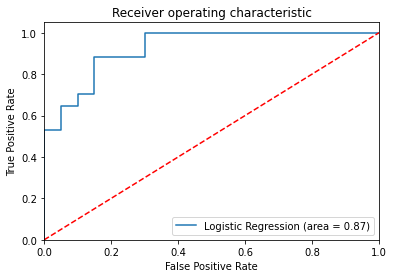

In [37]:
# En esta figrura se puede ver la proporción de falsos positivos con verdaderos positivos en el set de prueba
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

*Everolimus test*

In [38]:
path ='../../../../Data_preprocessing/Testing with everolimus/RNA+Clinic joined/Clinical_data_and_RNA_30_Features_everolimus.csv'
data = pd.read_csv(path)
data = data[['RNA_ID','MSKCC_FAVORABLE', 'MSKCC_INTERMEDIATE', 'MSKCC_NA', 'MSKCC_POOR','PFS','AC005307.1', 'ATP5G2P1', 'DLGAP4', 'EIF4A1P9', 'FAM172BP', 'FAM224A', 'GJA9', 'GPR155', 'GYPE', 'IL25', 'KLHL5', 'LANCL1-AS1', 'LEMD1', 'PCMT1', 'RP11-120J4.1', 'RP11-20G6.3', 'RP11-349G13.2', 'RP11-374M1.2', 'RP11-536C10.21', 'RP11-95G17.2', 'RP11-96O20.4', 'RP5-827C21.1', 'RPS12P26', 'SDR42E1', 'SNORD113-5', 'TARBP2', 'TRAV41', 'TRIM43B', 'VN2R17P', 'XPC']]

Y = [] # Target column
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)
data=data.drop([ 'PFS', 'RNA_ID'], axis=1)

In [39]:
data.head(5)

,MSKCC_FAVORABLE,MSKCC_INTERMEDIATE,MSKCC_NA,MSKCC_POOR,AC005307.1,ATP5G2P1,DLGAP4,EIF4A1P9,FAM172BP,FAM224A,...,RP11-96O20.4,RP5-827C21.1,RPS12P26,SDR42E1,SNORD113-5,TARBP2,TRAV41,TRIM43B,VN2R17P,XPC
0,1,0,0.0,0,20.963165,20.718850,34.41635,23.50908,24.03405,20.93744,...,20.77248,27.09131,31.45042,28.23012,21.27932,31.08288,25.86902,25.51490,20.93829,31.96084
1,1,0,0.0,0,21.013460,21.007349,34.33893,21.04557,21.20204,20.99973,...,21.03524,26.79393,28.60666,27.55631,20.88605,30.93771,29.24738,23.29578,20.99449,32.62522
2,0,1,0.0,0,21.013460,27.386479,34.45158,26.25294,21.20204,20.99973,...,21.03524,25.96827,29.55728,28.44482,20.88605,32.20350,30.68048,20.68433,20.99449,32.66731
3,0,0,0.0,1,21.013460,21.007349,34.07963,21.04557,25.10356,20.99973,...,21.03524,26.26191,28.32744,30.92530,20.88605,30.41685,29.69705,23.83079,20.99449,32.59007
4,1,0,0.0,0,21.013460,21.007349,33.36643,23.43899,21.20204,20.99973,...,21.03524,25.45149,29.25251,29.51644,20.88605,31.69236,21.47750,20.68433,20.99449,32.31981


In [40]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(data)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(Y),1) :
    if (yhatTest[i] == Y[i]):
        contTest = contTest + 1

print('Final accuracy on the testing dataset: ' + str(contTest/len(Y)))

Final accuracy on the testing dataset: 0.8846153846153846


In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y, yhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(Y)))
print('Prediction:        ' +str(yhatTest))


print(classification_report(Y, yhatTest))

----------------Confusion Matrix (Test)------------------
[[54  6]
 [ 9 61]]
Input data:  [1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0
 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0
 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1
 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0]
Prediction:        [1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0
 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0
 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1
 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        60
           1       0.91      0.87      0.89        70

    accuracy                           0.88       130
   macro avg       0.88      0.89      0.88       130
weighted avg       0.89      0.88      0.88       130

